In [1]:
from fl_spn.partitioner import FederatedDataPartitioner
from trainer import FederatedEiNetTrainer
from utils import load_dataset
from fl_spn.config import SupervisedFLConfig

SupervisedFLConfig.epochs

100

In [2]:
data = load_dataset(name="adult")

partitioner = FederatedDataPartitioner(
    X=data["X_train"],
    y=data["y_train"],
    feature_names=data["X_processed"].columns.tolist(),
    numeric_features=data["numeric_features"],
    categorical_features=data["categorical_features"],
)

In [3]:
print("\n" + "=" * 60)
print("🔵 Test 1: Horizontal Partitioning")
print("=" * 60)

horizontal_partition = partitioner.horizontal_partition(
    num_clients=SupervisedFLConfig.num_clients,
    random_state=SupervisedFLConfig.random_seed,
)

horizontal_trainer = FederatedEiNetTrainer(horizontal_partition)

horizontal_results = horizontal_trainer.train_federated_learning(
    data["X_processed"], epochs=SupervisedFLConfig.epochs, verbose=True
)
horizontal_eval = horizontal_trainer.evaluate_on_test(
        data["X_test"], data["y_test"], data["X_processed"].columns.tolist()
    )

INFO:fl_spn.partitioner:🔄 Performing HORIZONTAL partitioning into 3 clients...
INFO:fl_spn.partitioner:  Client 0: 12059 samples, 14 features
INFO:fl_spn.partitioner:  Client 1: 12059 samples, 14 features
INFO:fl_spn.partitioner:  Client 2: 12059 samples, 14 features
INFO:trainer:
🚀 Starting horizontal federated learning...
INFO:trainer:Training parameters: epochs=100
INFO:trainer:
📍 Training client client_0...
INFO:trainer:   Data shape: 12059 samples × 14 features
INFO:trainer:   🔗 Overlapping features: 14 feature(s)- ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
INFO:simple_einet.layers.distributions.piecewise_linear:Initializing piecewise linear distribution with data of shape torch.Size([12059, 1, 14]).



🔵 Test 1: Horizontal Partitioning


Initializing PiecewiseLinear Leaf Layer: 100%|██████████| 3/3 [00:00<00:00, 11.81it/s]
INFO:trainer:    📊 Model config: depth=2, sums=12, leaves=12
INFO:trainer:    🔧 Feature domains: 14 domain created
/Users/M279402/PycharmProjects/fl_spn/.venv/lib/python3.10/site-packages/simple_einet/layers/distributions/piecewise_linear.py:263: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BucketizationUtils.h:34.)
  indices = torch.searchsorted(xp, x, right=False)
INFO:trainer:Epoch:  5, Loss: 0.6680, Train Acc: 68.46%, F1: 49.19%
INFO:trainer:Epoch: 10, Loss: 0.6222, Train Acc: 75.34%, F1: 50.35%
INFO:trainer:Epoch: 15, Loss: 0.5842, Train Acc: 75.91%, F1: 53.16%
INFO:trainer:

In [4]:
print("\n" + "="*60)
print("🟢 Test 2: Vertical Partitioning")
print("="*60)

vertical_partition = partitioner.vertical_partition(
    num_clients=SupervisedFLConfig.num_clients, 
    random_state=SupervisedFLConfig.random_seed)

vertical_trainer = FederatedEiNetTrainer(vertical_partition)

vertical_results = vertical_trainer.train_federated_learning(
    data["X_processed"], epochs=SupervisedFLConfig.epochs, verbose=True
)

# 在測試集上評估
vertical_eval = vertical_trainer.evaluate_on_test(
    data["X_test"], data["y_test"], data["X_processed"].columns.tolist()
)

INFO:fl_spn.partitioner:🔄 Performing VERTICAL partitioning into 3 clients...
INFO:fl_spn.partitioner:  Client 0: 36177 samples, 4 features
INFO:fl_spn.partitioner:  Client 1: 36177 samples, 4 features
INFO:fl_spn.partitioner:  Client 2: 36177 samples, 6 features
INFO:trainer:
🚀 Starting vertical federated learning...
INFO:trainer:Training parameters: epochs=100
INFO:trainer:
📍 Training client client_0...
INFO:trainer:   Data shape: 36177 samples × 4 features
INFO:simple_einet.layers.distributions.piecewise_linear:Initializing piecewise linear distribution with data of shape torch.Size([36177, 1, 4]).



🟢 Test 2: Vertical Partitioning


Initializing PiecewiseLinear Leaf Layer: 100%|██████████| 3/3 [00:00<00:00, 32.10it/s]
INFO:trainer:    📊 Model config: depth=1, sums=8, leaves=8
INFO:trainer:    🔧 Feature domains: 4 domain created
INFO:trainer:Epoch:  5, Loss: 0.6821, Train Acc: 52.35%, F1: 51.91%
INFO:trainer:Epoch: 10, Loss: 0.6663, Train Acc: 55.61%, F1: 54.69%
INFO:trainer:Epoch: 15, Loss: 0.6521, Train Acc: 70.08%, F1: 66.67%
INFO:trainer:Epoch: 20, Loss: 0.6392, Train Acc: 68.09%, F1: 62.79%
INFO:trainer:Epoch: 25, Loss: 0.6275, Train Acc: 69.23%, F1: 63.52%
INFO:trainer:Epoch: 30, Loss: 0.6167, Train Acc: 69.59%, F1: 64.01%
INFO:trainer:Epoch: 35, Loss: 0.6066, Train Acc: 71.66%, F1: 67.85%
INFO:trainer:Epoch: 40, Loss: 0.5971, Train Acc: 71.83%, F1: 68.20%
INFO:trainer:Epoch: 45, Loss: 0.5881, Train Acc: 72.03%, F1: 68.39%
INFO:trainer:Epoch: 50, Loss: 0.5794, Train Acc: 72.15%, F1: 68.45%
INFO:trainer:Epoch: 55, Loss: 0.5711, Train Acc: 72.99%, F1: 69.04%
INFO:trainer:Epoch: 60, Loss: 0.5630, Train Acc: 73.2

In [7]:
print("\n" + "=" * 60)
print("🟡 Test 3: Hybrid Partitioning")
print("=" * 60)

hybrid_partition = partitioner.hybrid_partition(
    num_clients=SupervisedFLConfig.num_clients,
    sample_overlap_ratio=SupervisedFLConfig.sample_overlap_ratio,
    feature_overlap_ratio=SupervisedFLConfig.feature_overlap_ratio,
    random_state=SupervisedFLConfig.random_seed,
)
hybrid_trainer = FederatedEiNetTrainer(hybrid_partition)
hybrid_results = hybrid_trainer.train_federated_learning(
    data["X_processed"], epochs=SupervisedFLConfig.epochs, verbose=True
)
hybrid_eval = hybrid_trainer.evaluate_on_test(
        data["X_test"], data["y_test"], data["X_processed"].columns.tolist()
    )

INFO:fl_spn.partitioner:🔄 Performing HYBRID partitioning into 3 clients...
INFO:fl_spn.partitioner:  Sample overlap ratio: 0.0%
INFO:fl_spn.partitioner:  Feature overlap ratio: 0.0%
INFO:fl_spn.partitioner:  Base samples: 18087; Overlap sample pool: 0
INFO:fl_spn.partitioner:  Base features: 6; Overlap feature pool: 0
INFO:fl_spn.partitioner:  Client 0: 6029 samples × 2 features
INFO:fl_spn.partitioner:  Client 1: 6029 samples × 2 features
INFO:fl_spn.partitioner:  Client 2: 6029 samples × 2 features
INFO:trainer:
🚀 Starting hybrid_robust federated learning...
INFO:trainer:Training parameters: epochs=100
INFO:trainer:
📍 Training client client_0...
INFO:trainer:   Data shape: 6029 samples × 2 features
INFO:simple_einet.layers.distributions.piecewise_linear:Initializing piecewise linear distribution with data of shape torch.Size([6029, 1, 2]).



🟡 Test 3: Hybrid Partitioning


Initializing PiecewiseLinear Leaf Layer: 100%|██████████| 3/3 [00:00<00:00, 114.95it/s]
INFO:trainer:    📊 Model config: depth=1, sums=4, leaves=4
INFO:trainer:    🔧 Feature domains: 2 domain created
INFO:trainer:Epoch:  5, Loss: 0.6939, Train Acc: 54.32%, F1: 53.20%
INFO:trainer:Epoch: 10, Loss: 0.6789, Train Acc: 57.62%, F1: 56.32%
INFO:trainer:Epoch: 15, Loss: 0.6664, Train Acc: 65.33%, F1: 63.02%
INFO:trainer:Epoch: 20, Loss: 0.6562, Train Acc: 65.33%, F1: 63.02%
INFO:trainer:Epoch: 25, Loss: 0.6478, Train Acc: 65.40%, F1: 63.08%
INFO:trainer:Epoch: 30, Loss: 0.6406, Train Acc: 65.40%, F1: 63.08%
INFO:trainer:Epoch: 35, Loss: 0.6341, Train Acc: 65.40%, F1: 63.08%
INFO:trainer:Epoch: 40, Loss: 0.6280, Train Acc: 65.40%, F1: 63.08%
INFO:trainer:Epoch: 45, Loss: 0.6219, Train Acc: 65.40%, F1: 63.08%
INFO:trainer:Epoch: 50, Loss: 0.6158, Train Acc: 65.40%, F1: 63.08%
INFO:trainer:Epoch: 55, Loss: 0.6095, Train Acc: 65.42%, F1: 63.10%
INFO:trainer:Epoch: 60, Loss: 0.6031, Train Acc: 65.

In [15]:
methods = ['Horizontal', 'Vertical', 'Hybrid']

train_acc = [t.item() for t in [horizontal_results['weighted_accuracy'], 
             vertical_results['weighted_accuracy'], 
             hybrid_results['weighted_accuracy']]]

f1_acc = [horizontal_results['weighted_f1'], 
          vertical_results['weighted_f1'], 
          hybrid_results['weighted_f1']]

train_time = [horizontal_results['total_training_time'], 
              vertical_results['total_training_time'], 
              hybrid_results['total_training_time']]

clients = [horizontal_results['num_clients'], 
           vertical_results['num_clients'], 
           hybrid_results['num_clients']]

samples = [horizontal_results['total_samples'], 
           vertical_results['total_samples'], 
           hybrid_results['total_samples']]

colors = ['#F3AA60', '#EF6262', '#468897']


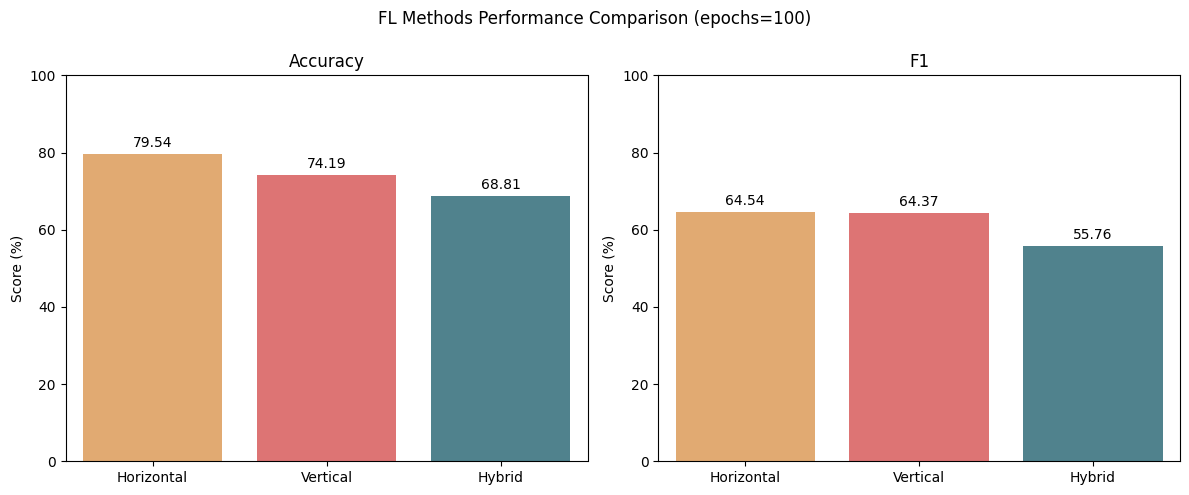

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

methods_idx = np.arange(len(methods))  # 對齊X軸位置
bar_width = 0.6

colors_dict = {method: color for method, color in zip(methods, colors)}

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle(f'FL Methods Performance Comparison (epochs={SupervisedFLConfig.epochs})')

sns.barplot(
    x=methods, y=train_acc, hue=methods, palette=colors_dict, ax=axs[0], errorbar=None
)
axs[0].set_title('Accuracy')
axs[0].set_ylim([0, 100])
axs[0].set_ylabel("Score (%)")

for idx, val in enumerate(train_acc):
    axs[0].text(idx, val+1, f"{val:.2f}", ha='center', va='bottom', fontsize=10)

# F1 子圖
sns.barplot(
    x=methods, y=f1_acc, hue=methods, palette=colors_dict, ax=axs[1], errorbar=None
)
axs[1].set_title('F1')
axs[1].set_ylim([0, 100])
axs[1].set_ylabel("Score (%)")
for idx, val in enumerate(f1_acc):
    axs[1].text(idx, val+1, f"{val:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

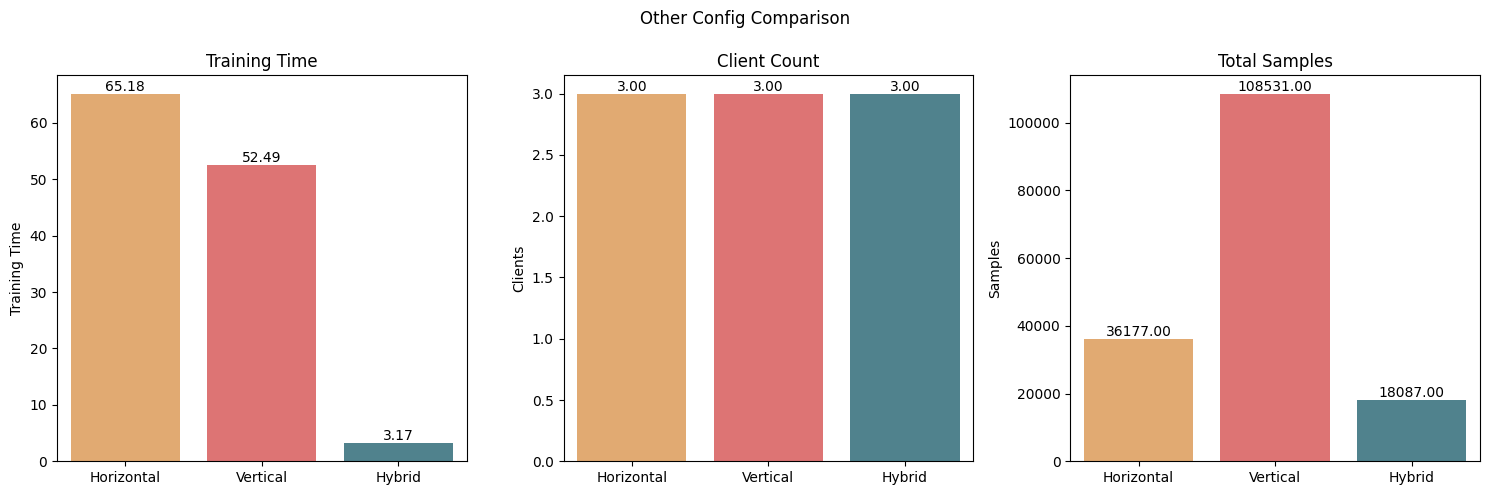

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Other Config Comparison')

titles = ['Training Time', 'Client Count', 'Total Samples']
ydata = [train_time, clients, samples]
ylabs = ['Training Time', 'Clients', 'Samples']

for idx in range(3):
    sns.barplot(
        x=methods, y=ydata[idx], ax=axs[idx], hue=methods,
        palette=colors_dict, errorbar=None, legend=False
    )
    axs[idx].set_title(titles[idx])
    axs[idx].set_xlabel("")  # 不額外標註
    axs[idx].set_ylabel(ylabs[idx])
    # 若要label在頂端
    for i, val in enumerate(ydata[idx]):
        axs[idx].text(i, val, f"{val:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()